In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

In [3]:
sales=pd.read_csv('C:/Users/Admin/Desktop/Kittu/salescars.csv',index_col=0,parse_dates=[0],date_parser=parser)
sales.head(3)

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


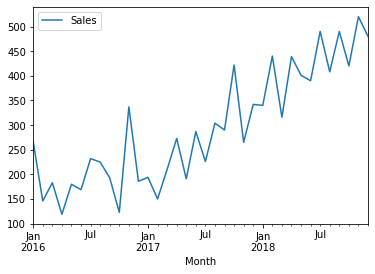

In [5]:
sales.plot()

sationary means mean, variance and covariance is constant over periods.

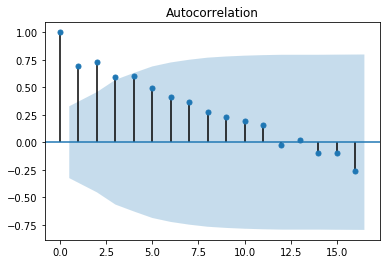

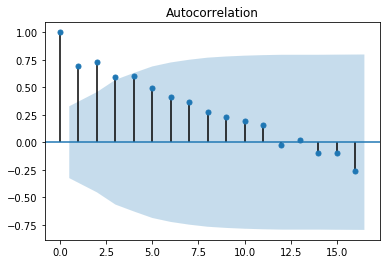

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

converting series to stationary

In [9]:
sales_diff=sales.diff(periods=1)
#integrated of order 1, denoted by d (for diff), one of the parameter for ARIMA model

In [10]:
sales_diff=sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


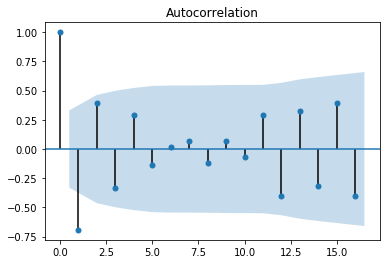

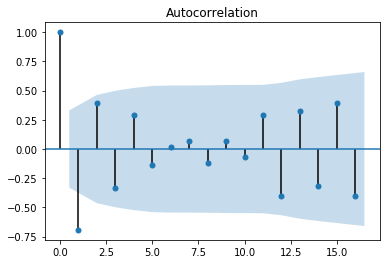

In [11]:
plot_acf(sales_diff)

In [12]:
sales.shape

(36, 1)

In [13]:
X=sales.values
train=X[0:27]
test=X[27:]
predicions=[]

Autoregressive model 

In [15]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar=AR(train)
model_ar_fit=model_ar.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [18]:
predictions= model_ar_fit.predict(start=26,end=36)
predictions

array([348.46470112, 398.22922886, 368.27242294, 429.47485941,
       379.17750391, 431.35262347, 399.90234723, 433.3589338 ,
       418.74469463, 453.45711544, 429.65174489])

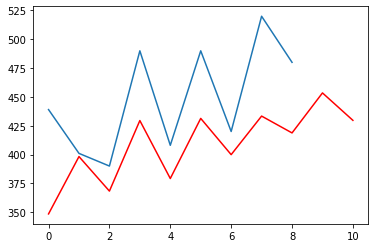

In [21]:
plt.plot(test)
plt.plot(predictions,color='red')

ARIMA Model

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
#p,d,q- p-> periods taken for autorgressive model
#d-> Integrated order,difference
#q-> periods in moving average model
model_arima=ARIMA(train,order=(3,1,0))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

294.85435842186024


In [24]:
predictions=model_arima_fit.forecast(steps=9)[0]
predictions

array([393.12491233, 367.08450679, 432.19168607, 370.1811773 ,
       424.07800322, 400.3334276 , 444.76773981, 412.5415048 ,
       450.35920483])

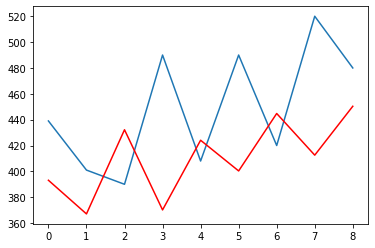

In [25]:
plt.plot(test)
plt.plot(predictions,color='red')

In [27]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [29]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima=ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
#low pic is good here 291  is low pic is good

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.25060028727887
(0, 0, 3) nan
(0, 0, 4) 310.1669328592633
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.32292269078266
(0, 1, 3) 298.31202117389336
(0, 1, 4) 300.3393975617985
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(0, 2, 2) 290.3983417235849
(0, 2, 3) 292.9858847060129
(1, 0, 0) 316.1668717534279
(1, 0, 1) 313.0487174406702
(1, 0, 2) 310.9790642275034
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112585196
(1, 1, 2) 299.47166670629457
(1, 1, 3) 301.28511809480204
(1, 2, 0) 306.53077675708374
(2, 0, 0) 310.9969573612191
(2, 0, 1) 342.5246358294303
(2, 1, 0) 300.20895612399573
(2, 1, 1) 297.99999301674006
(2, 1, 2) 298.55054281302245
(2, 1, 3) 302.87208388612163
(2, 2, 0) 306.2975856431866
(3, 0, 0) 312.9838587473828
(3, 0, 1) 336.078521041164
(3, 1, 0) 294.85435842186024
(3, 1, 1) 295.9979353418612
(3, 1, 2) 292.66862386939545
(3, 1, 3) 294.6588907518689
(3, 2, 0) 299.4075868